In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay



In [2]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
names = pd.read_csv('/kaggle/input/crop-names/crop_names.csv')
soil = pd.read_csv('/kaggle/input/crop-soilcsv/soil.csv')

In [3]:
df.head(3)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice

In [4]:
names.head(3)

Crop Scientific_name
0      apple    Malus Pumila
1     banana            Musa
2  blackgram     Vigns mungo

In [5]:
soil.head(3)

crop    soil
0   rice   loamy
1   rice  clayey
2  maize   loamy

In [6]:
len(df['label'].value_counts())

22

In [7]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.shape

(2200, 8)

In [10]:
X = df.drop('label',axis=1)
y = df['label']

In [11]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [12]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
label_values = df['label'].unique().tolist()


# 1) Local Interpretable Model-Agnostic Explanations (lime)


In [14]:
# from lime.lime_tabular import LimeTabularExplainer

# Assuming X_train is your training data DataFrame and X is your feature DataFrame
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), class_names=label_values)


In [15]:

# Explain a single instance
choosen_instance = X_test.iloc[[343]].values[0]
exp1 = explainer.explain_instance(choosen_instance, rf.predict_proba, num_features=7)
exp1.show_in_notebook()

In [16]:

# Explain a single instance
exp2 = explainer.explain_instance(X_test.iloc[1], rf.predict_proba, num_features=7)
exp2.show_in_notebook()

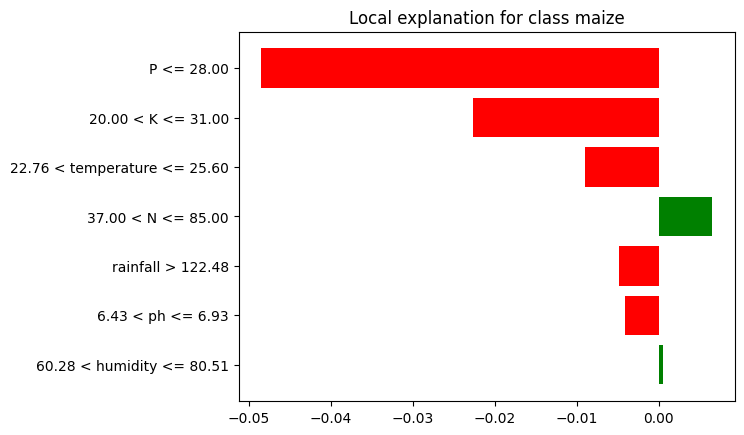

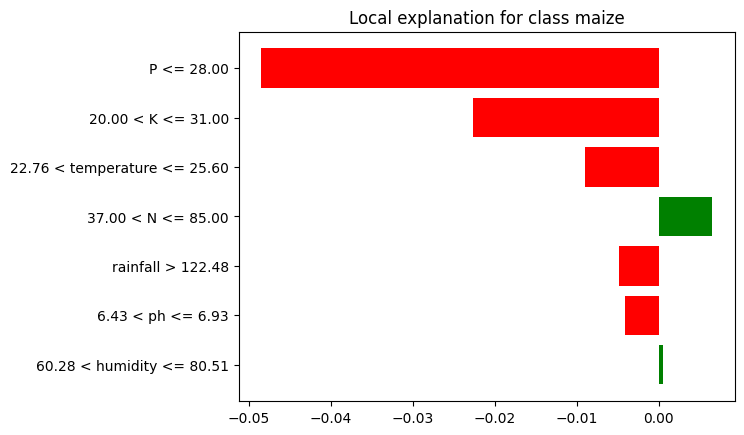

In [17]:
exp1.as_pyplot_figure()

In [18]:

# Explain a single instance
exp3 = explainer.explain_instance(X_test.iloc[2], rf.predict_proba, num_features=7)
exp3.show_in_notebook()

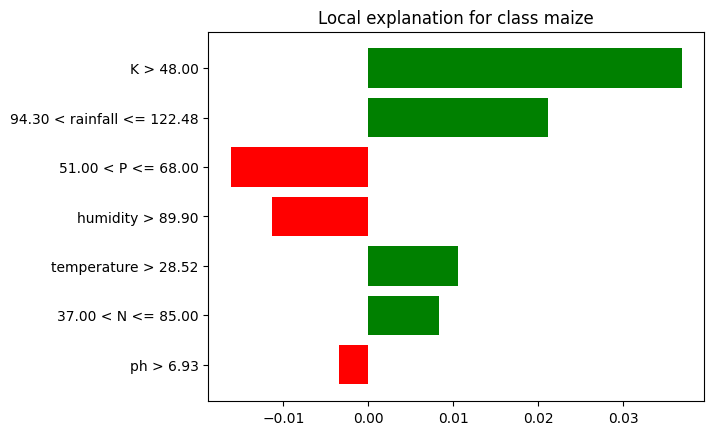

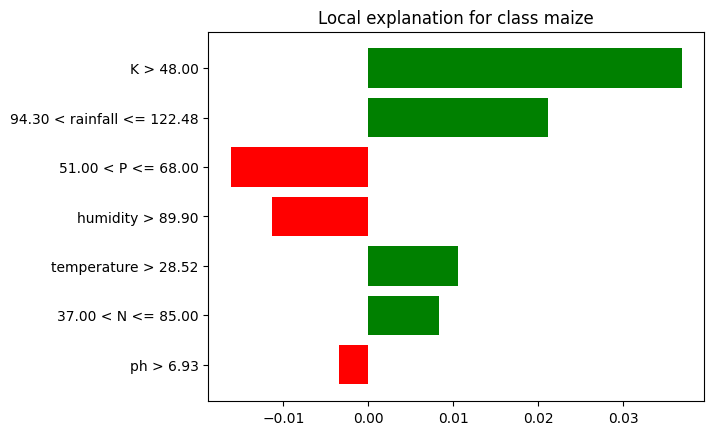

In [19]:
exp3.as_pyplot_figure()

In [20]:

# Explain a single instance
exp4 = explainer.explain_instance(X_test.iloc[3], rf.predict_proba, num_features=7)
exp4.show_in_notebook(show_predicted_value=True,predict_proba=True)

100%|===================| 9637/9680 [01:30<00:00]       

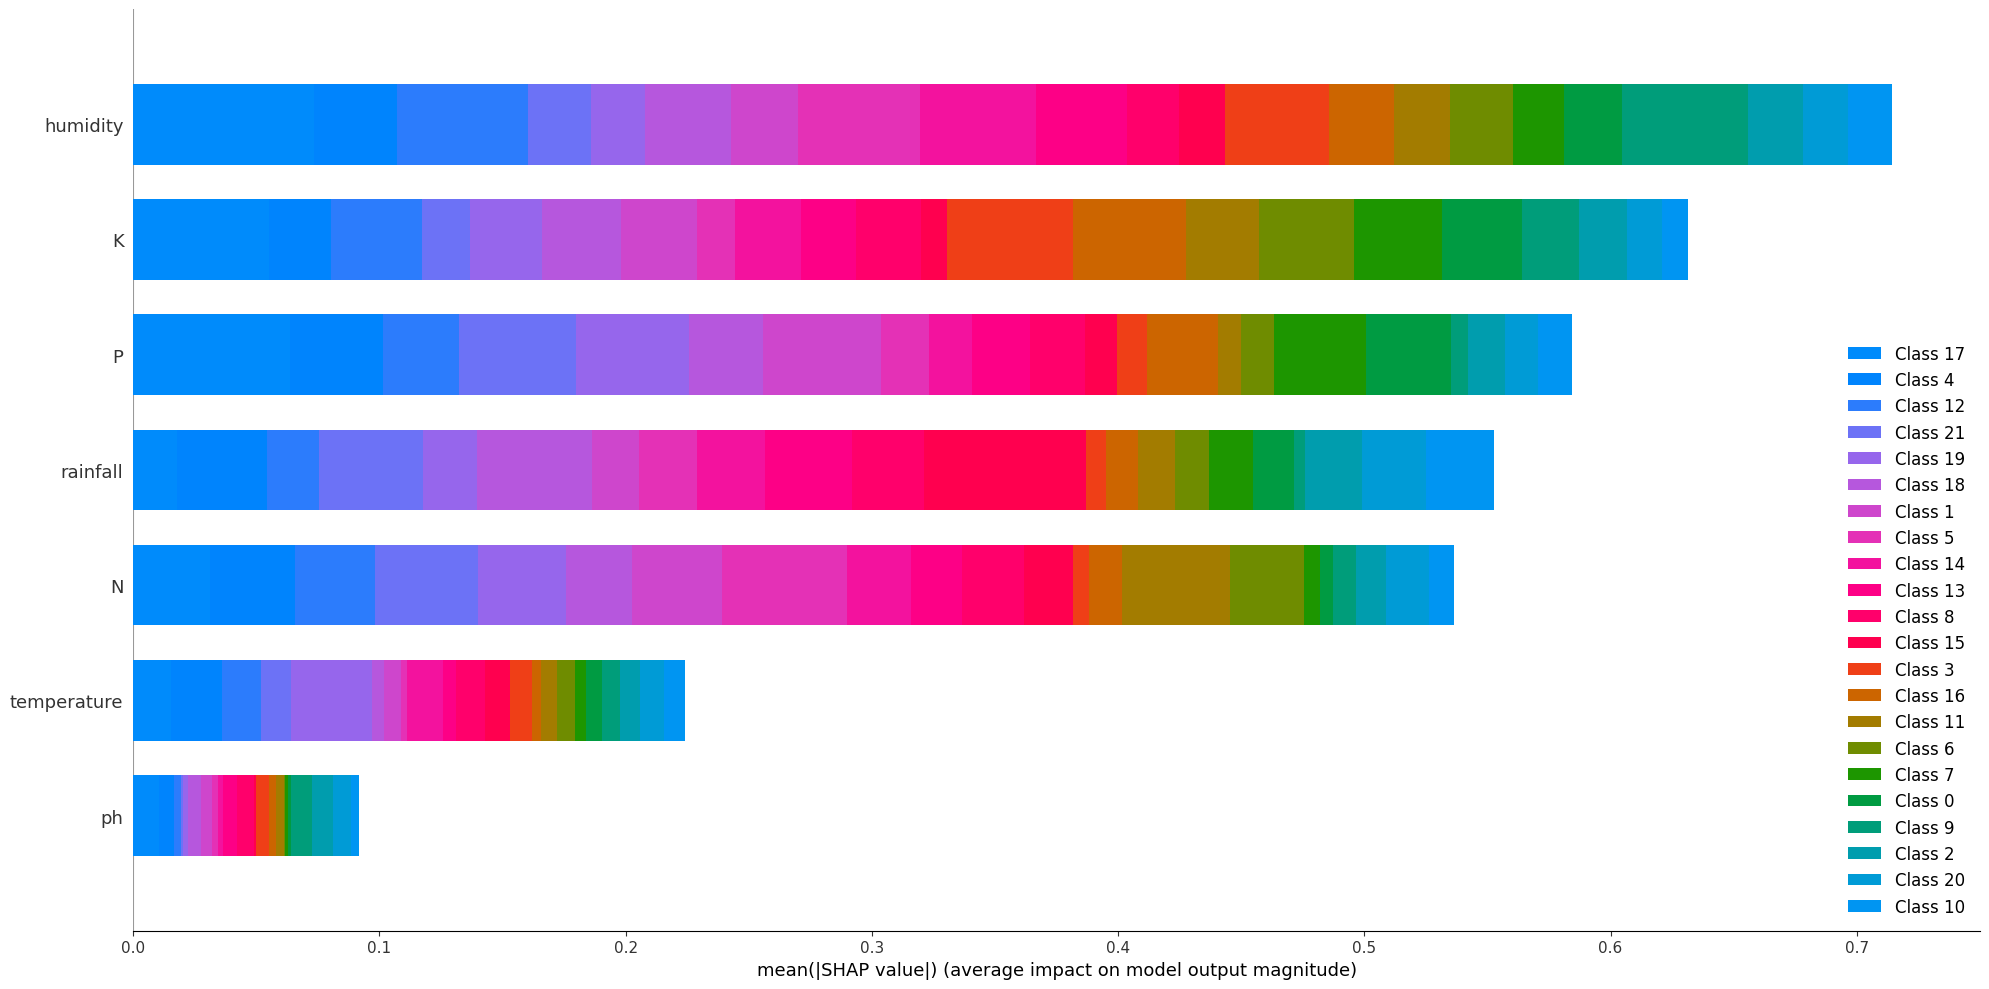

In [21]:
import shap

# # Create a SHAP explainer
explainer = shap.Explainer(rf, X_train)
# # Calculate SHAP values for a set of instances
shap_values = explainer.shap_values(X_test, check_additivity=False)
# Set the plot size (e.g., width=10 inches, height=6 inches)
plot_size = (20, 10)

# Visualize SHAP summary plot with the specified plot size
shap.summary_plot(shap_values, X_test, plot_size=plot_size)

# Show the plot
plt.show()

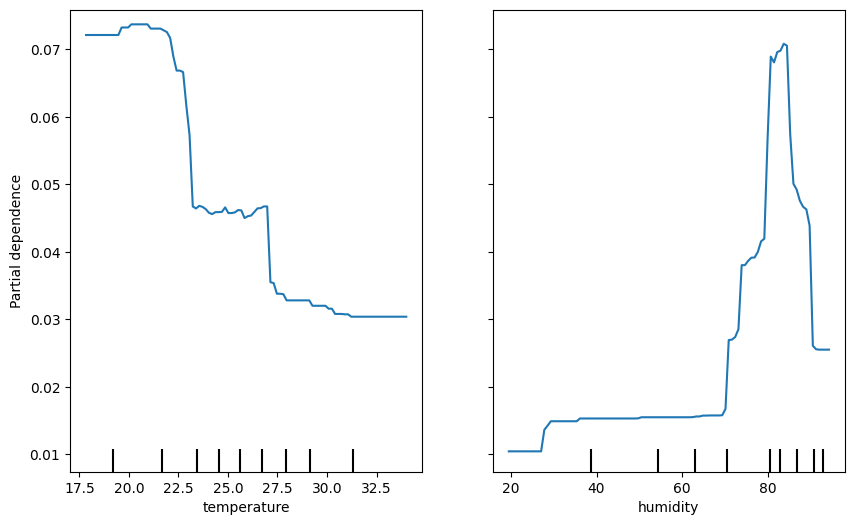

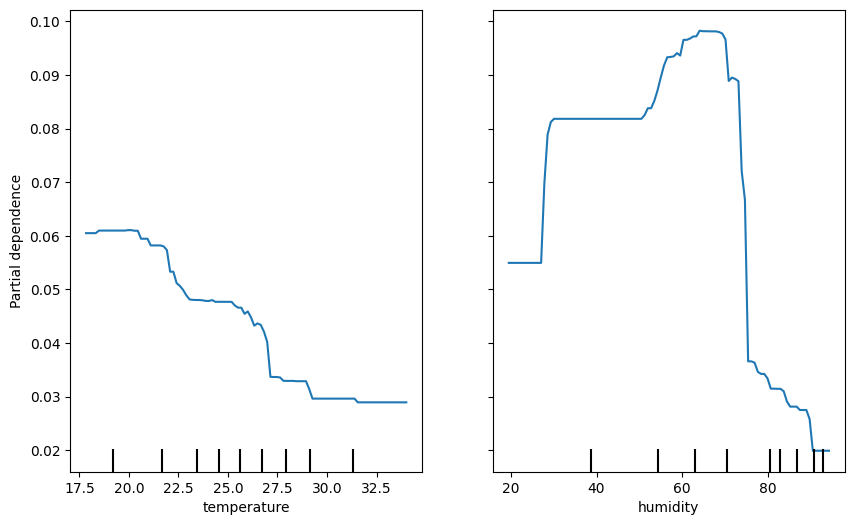

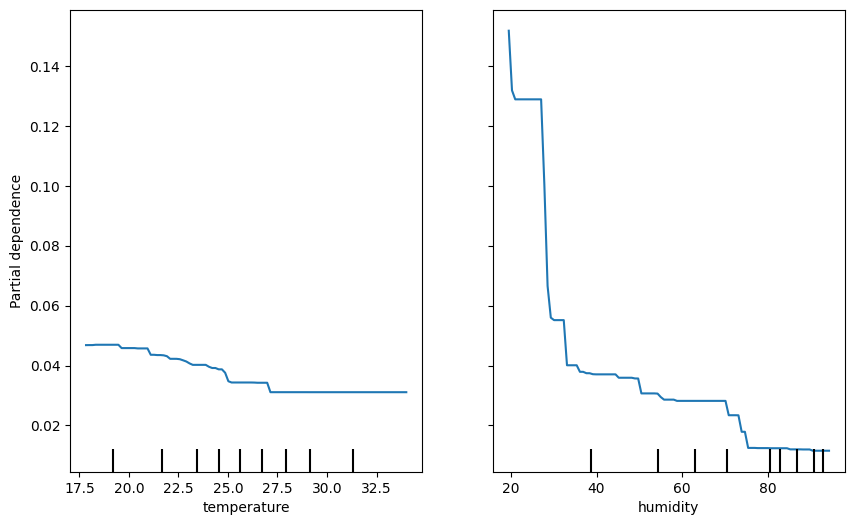

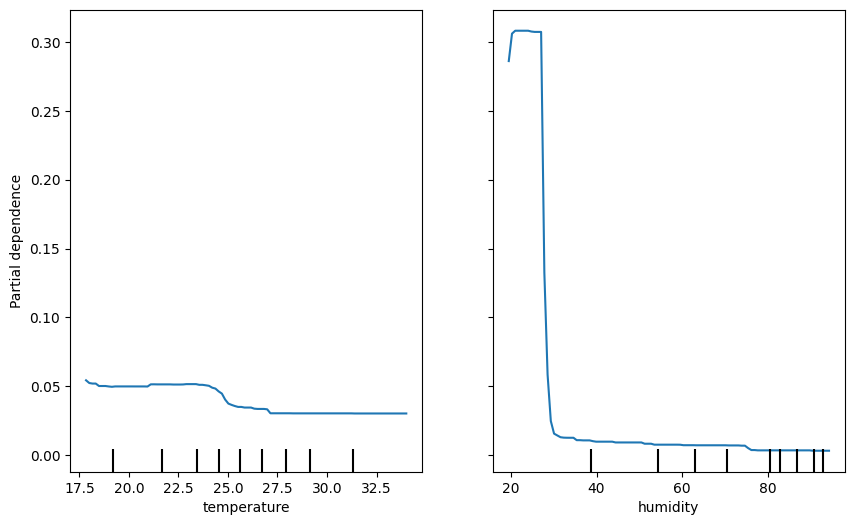

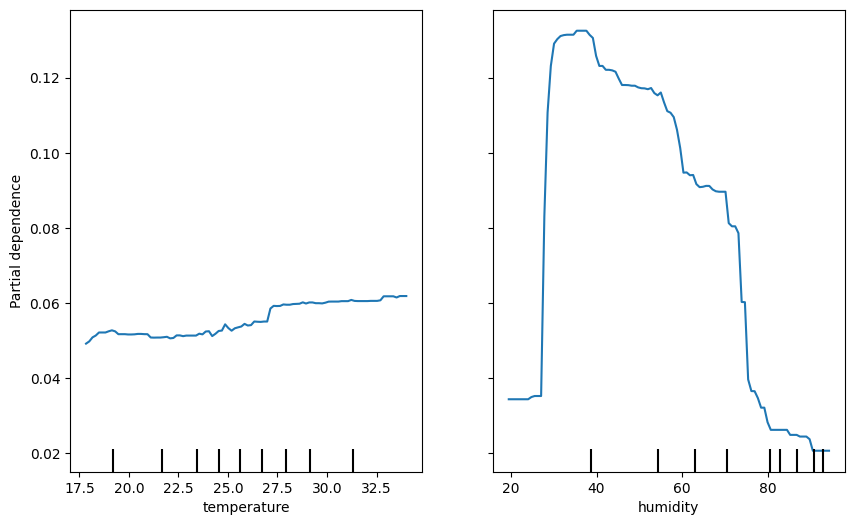

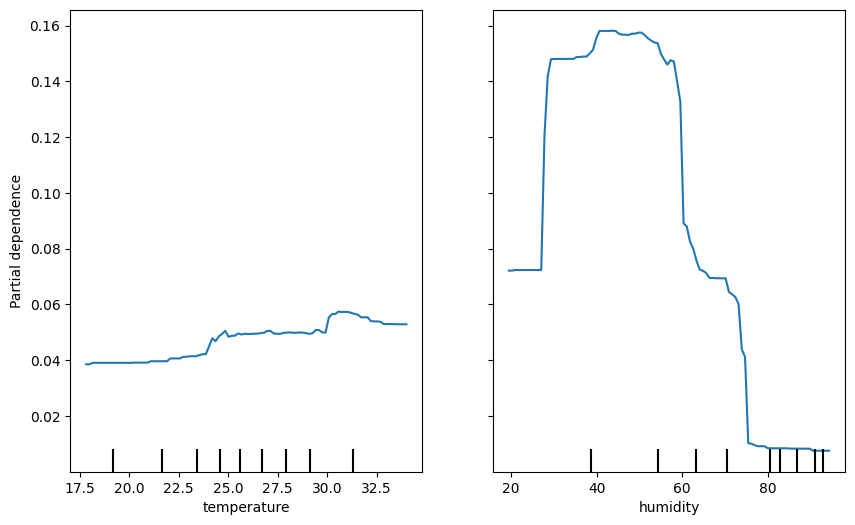

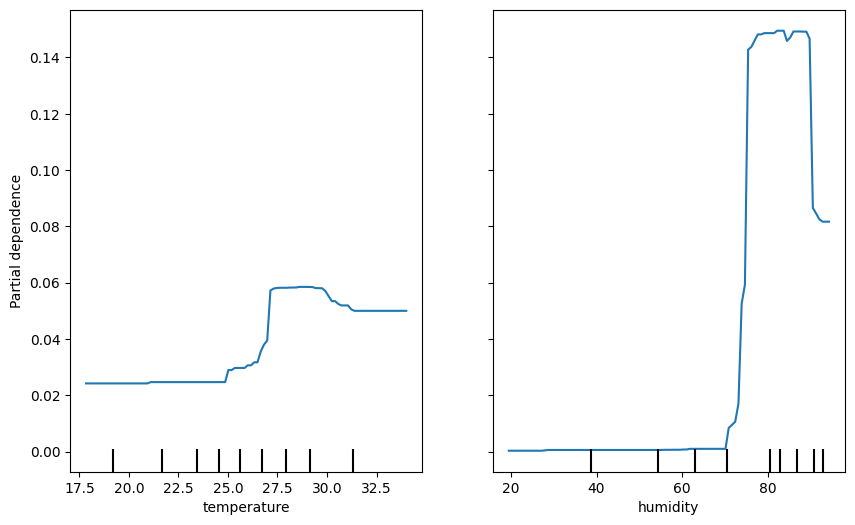

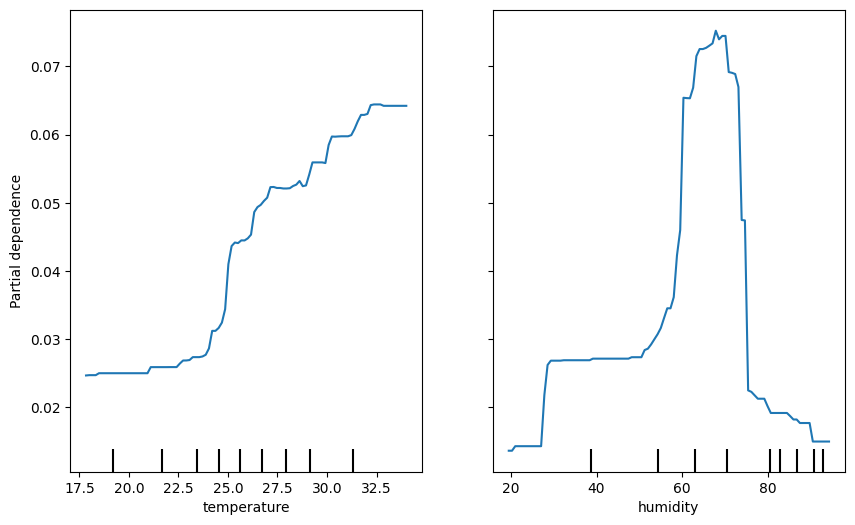

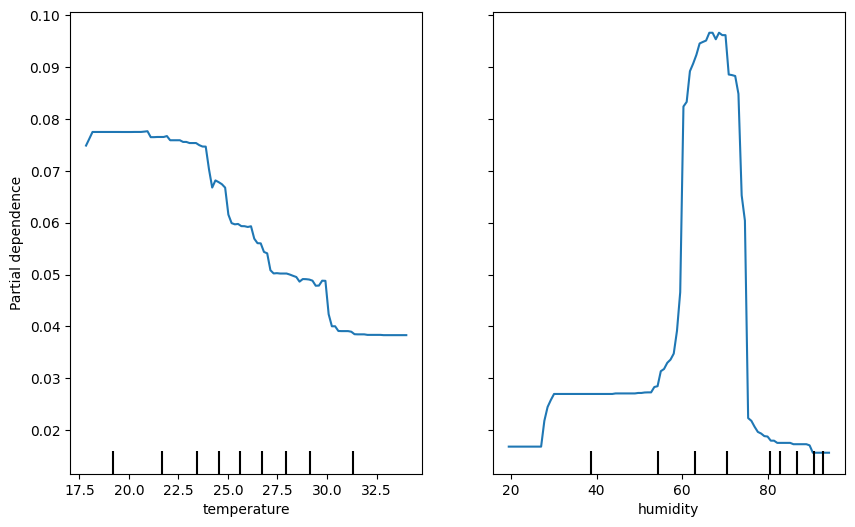

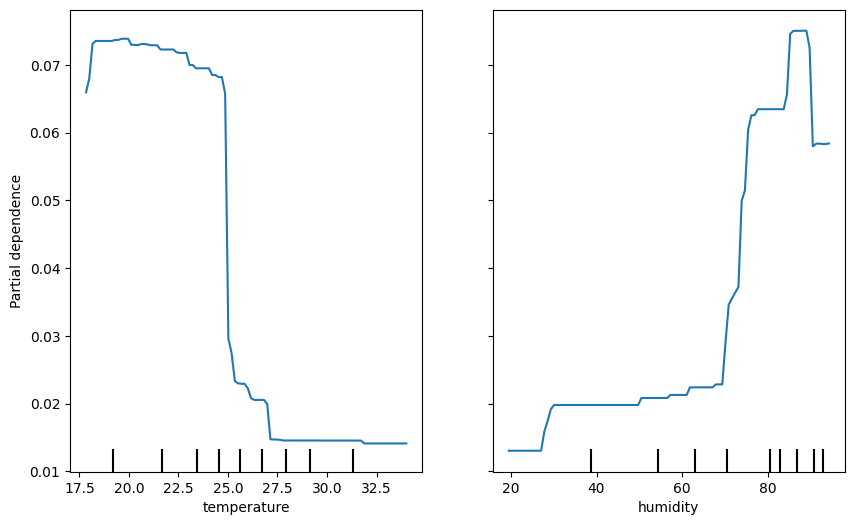

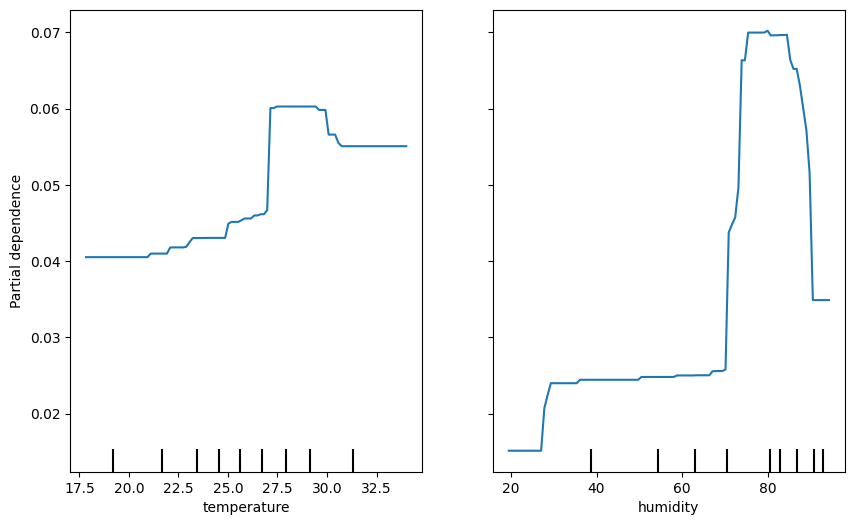

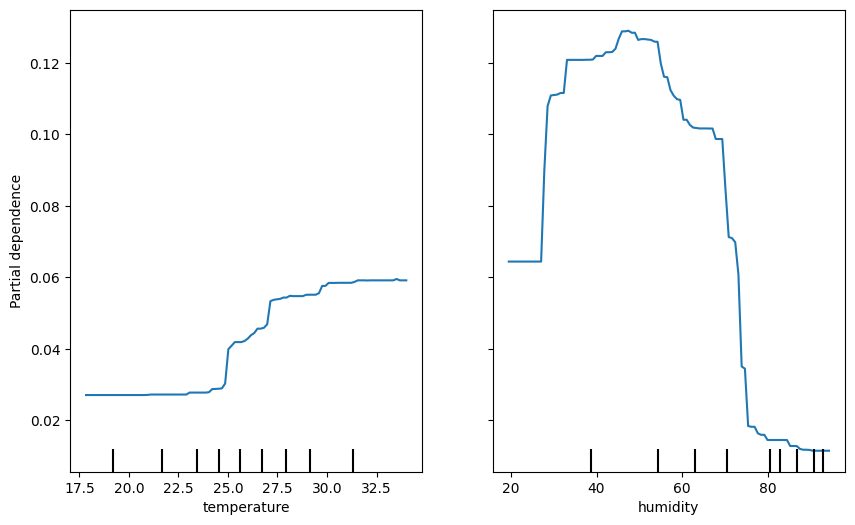

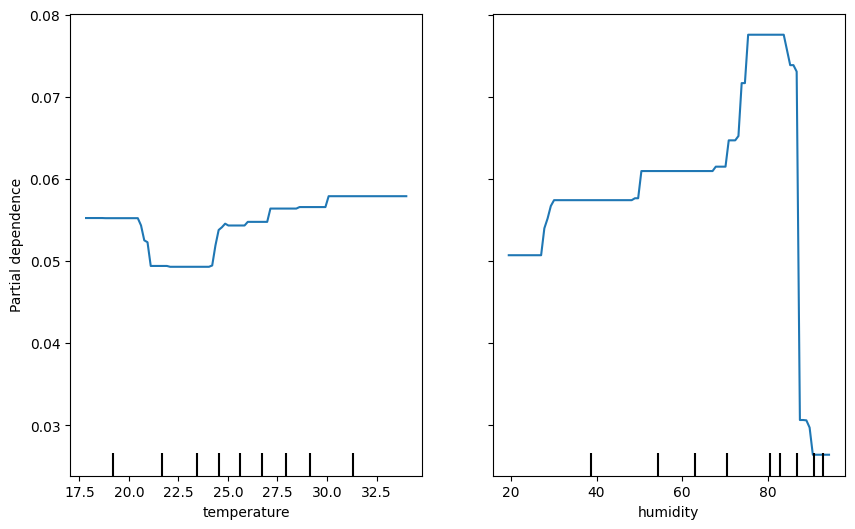

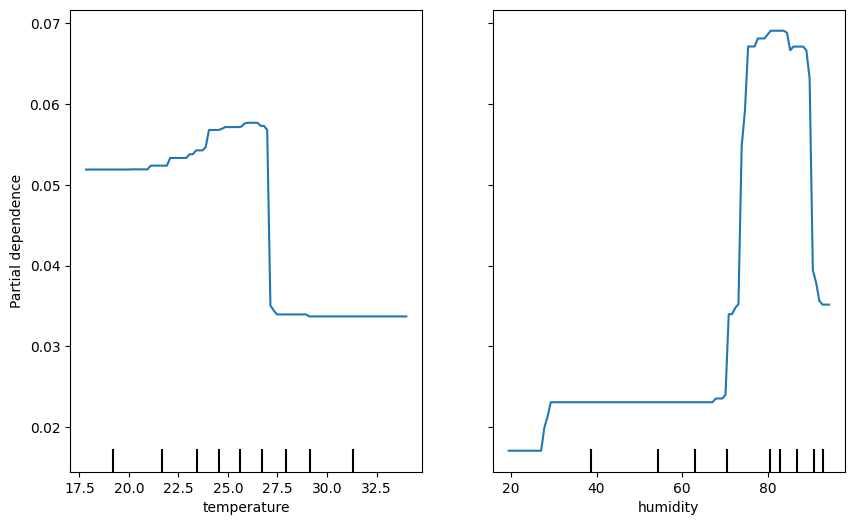

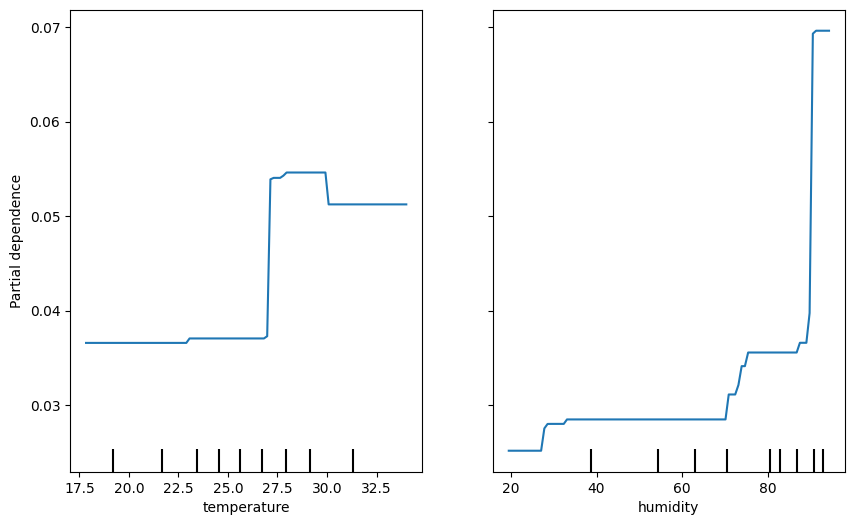

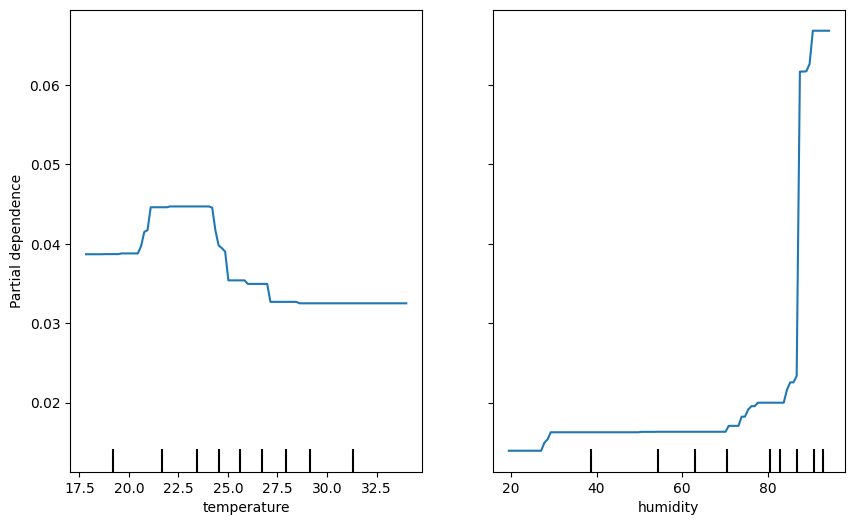

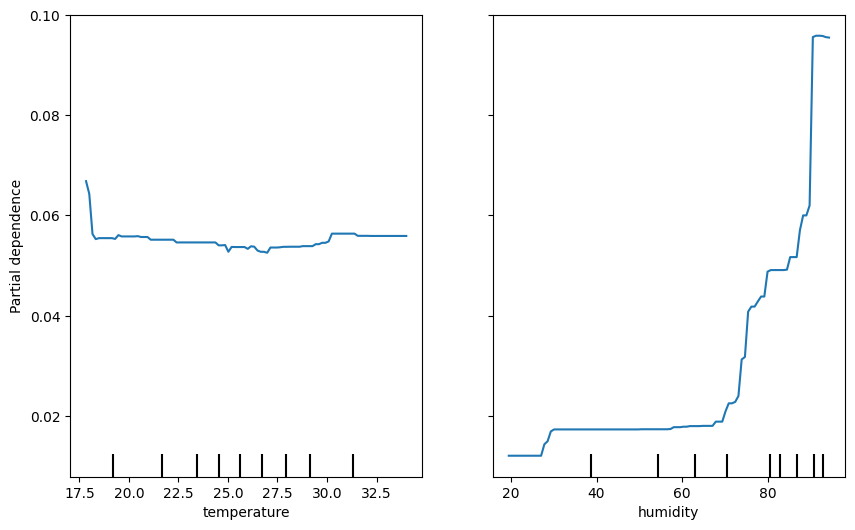

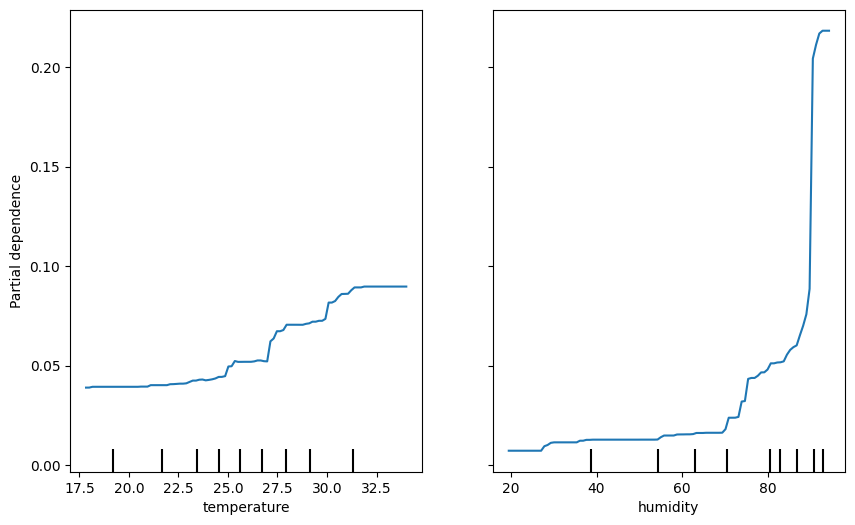

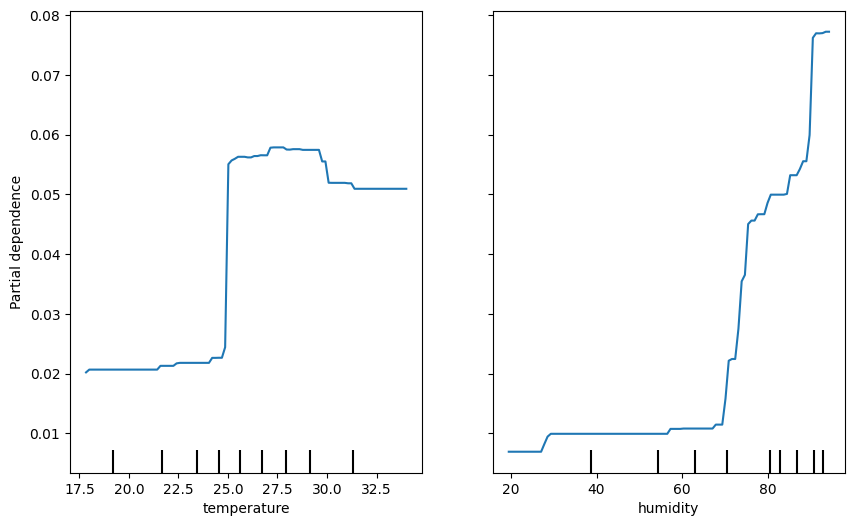

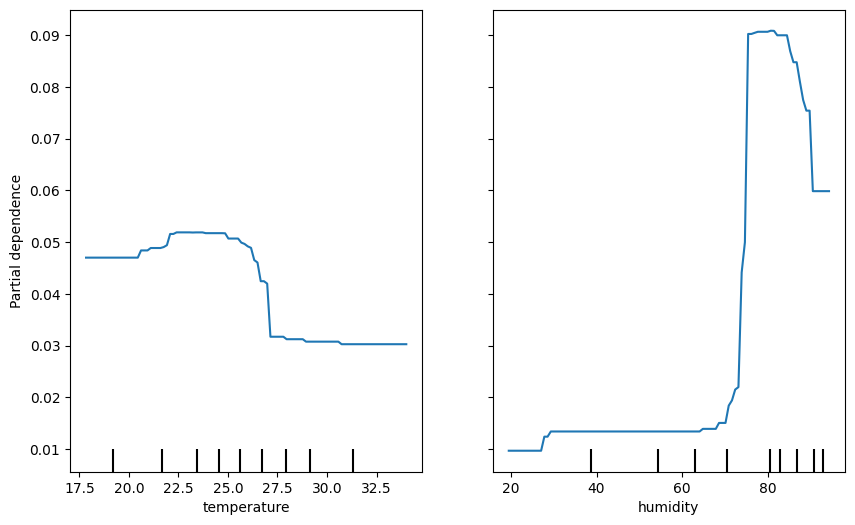

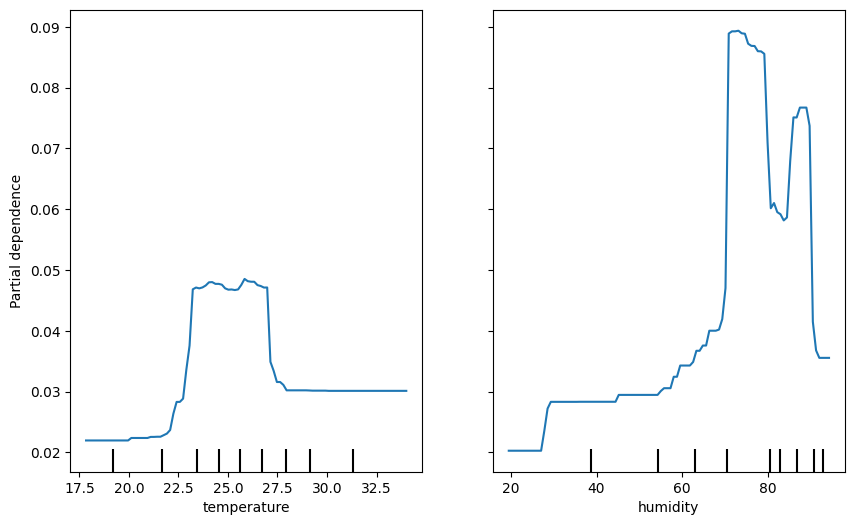

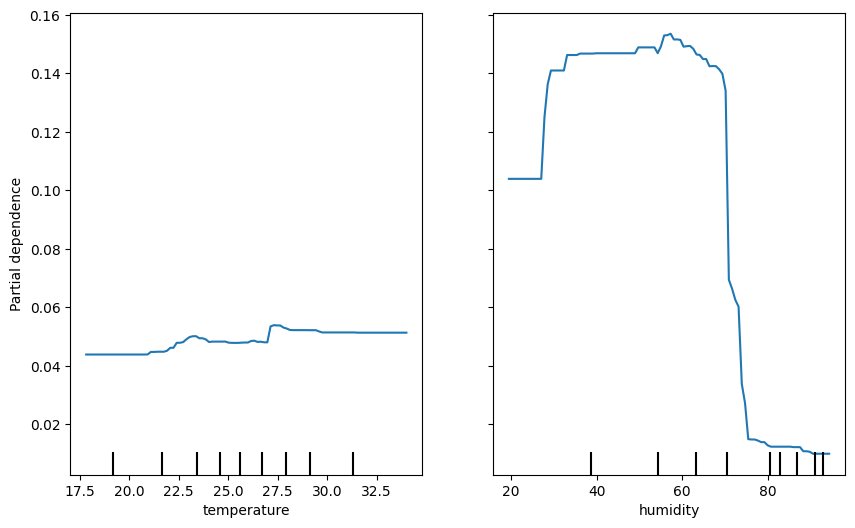

In [22]:
for target in df['label'].unique().tolist():

    # Create a PartialDependenceDisplay object for 'temperature' and 'humidity' features
    fig, ax = plt.subplots(figsize=(10, 6))
    display = PartialDependenceDisplay.from_estimator(
        rf, X_train, features=['temperature', 'humidity'], ax=ax, target=target
    )

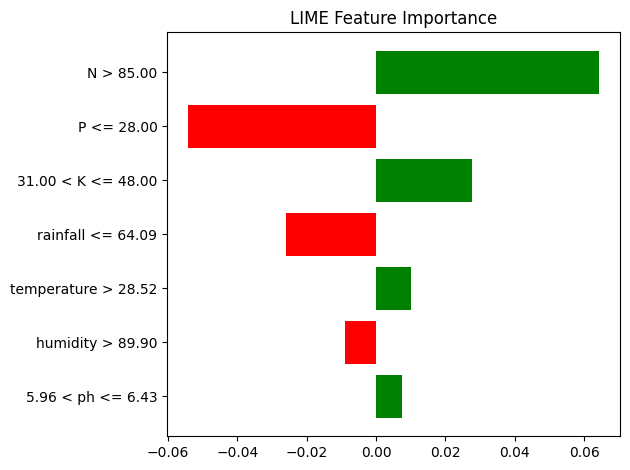

In [23]:
# Apply Lime
from lime.lime_tabular import LimeTabularExplainer


# Initialize Lime for Tabular data
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, discretize_continuous=True)

# # Explain a specific instance
instance_idx = 0
instance = X_test.iloc[instance_idx]
exp = explainer.explain_instance(instance.values, rf.predict_proba, num_features=len(X_test.columns))

# Plot Lime feature importance
# fig, ax = plt.subplots()
exp.as_pyplot_figure()
plt.title('LIME Feature Importance')
plt.tight_layout()
plt.show()


# 2) SHapley Additive exPlanations (SHAP)